In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
mode = "color"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 322s 2s/step - loss: 1.6263 - rpn_class_loss: 0.0636 - rpn_bbox_loss: 0.4014 - mrcnn_class_loss: 0.2942 - mrcnn_bbox_loss: 0.4331 - mrcnn_mask_loss: 0.4339 - val_loss: 1.9206 - val_rpn_class_loss: 0.0573 - val_rpn_bbox_loss: 0.7461 - val_mrcnn_class_loss: 0.2334 - val_mrcnn_bbox_loss: 0.4600 - val_mrcnn_mask_loss: 0.4238
Epoch 2/10
150/150 [==============================] - 141s 939ms/step - loss: 1.1442 - rpn_class_loss: 0.0205 - rpn_bbox_loss: 0.3247 - mrcnn_class_loss: 0.1789 - mrcnn_bbox_loss: 0.2798 - mrcnn_mask_loss: 0.3403 - val_loss: 1.5027 - val_rpn_class_loss: 0.0565 - val_rpn_bbox_loss: 0.6164 - val_mrcnn_class_loss: 0.1286 - val_mrcnn_bbox_loss: 0.3535 - val_mrcnn_mask_loss: 0.3476
Epoch 3/10
150/150 [==============================] - 151s 1s/step - loss: 0.8301 - rpn_class_loss: 0.0168 - rpn_bbox_loss: 0.2102 - mrcnn_class_loss: 0.1090 - mrcnn_bbox_loss: 0.1989 - mrcnn_mask_loss: 0.2952 - val_loss: 1.6275 - val_rpn_clas

In [6]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_color20181220T0938/mask_rcnn_sdmaskrcnn_finetune_color_0008.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Loading weights from  models/sdmaskrcnn_finetune_color20181220T0938/mask_rcnn_sdmaskrcnn_finetune_color_0008.h5
Re-starting from epoch 8


{'rois': array([[245, 240, 336, 329],
       [323, 306, 428, 406],
       [ 96, 101, 281, 306],
       [214, 306, 277, 395],
       [252, 377, 403, 507],
       [154, 408, 251, 474],
       [110, 309, 208, 386],
       [119, 352, 232, 444],
       [261, 325, 314, 386],
       [172, 193, 219, 238],
       [172, 366, 220, 420],
       [347, 422, 390, 454],
       [133, 379, 196, 437],
       [167,  96, 295, 198],
       [143, 318, 190, 369],
       [ 94, 197, 201, 309],
       [254, 373, 329, 445],
       [189, 437, 266, 495]], dtype=int32), 'scores': array([0.99999917, 0.99996936, 0.9994809 , 0.99750286, 0.9974027 ,
       0.99140537, 0.98624706, 0.98388135, 0.9737143 , 0.9631229 ,
       0.92328936, 0.902045  , 0.89731205, 0.857782  , 0.843133  ,
       0.7959812 , 0.7920608 , 0.75477946], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 18)


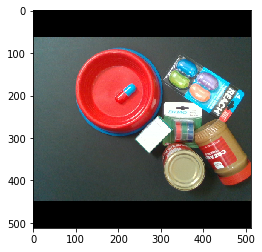

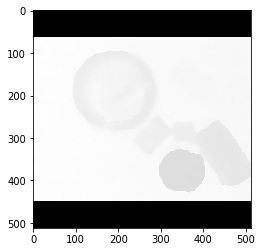

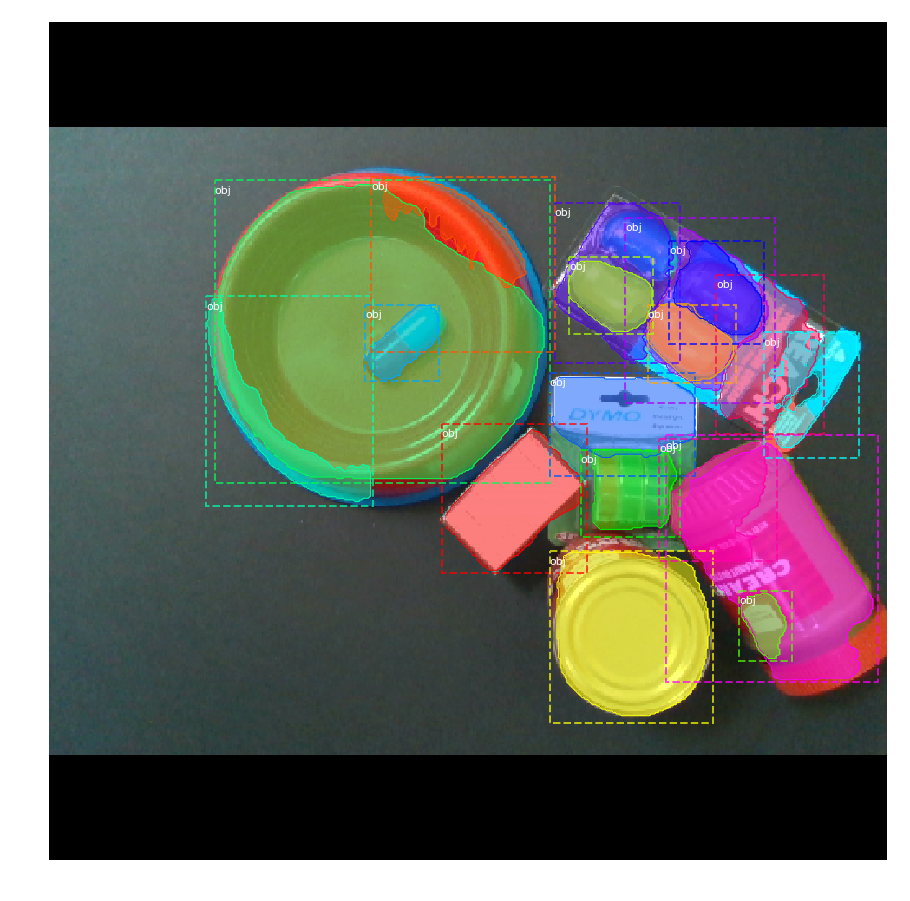

{'rois': array([[339, 197, 441, 265],
       [326, 317, 438, 422],
       [124, 198, 210, 368],
       [179, 425, 245, 462],
       [172,  15, 232, 208],
       [259, 340, 322, 434],
       [230, 242, 307, 370],
       [320, 316, 371, 370],
       [236, 363, 278, 427],
       [272, 249, 327, 356],
       [168,  99, 211, 208],
       [201,   5, 240, 111],
       [276, 369, 307, 409]], dtype=int32), 'scores': array([0.99998903, 0.99950397, 0.9992286 , 0.9982998 , 0.9923764 ,
       0.97762054, 0.9602207 , 0.9442711 , 0.9421859 , 0.9409095 ,
       0.9201666 , 0.8681558 , 0.7881602 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 13)


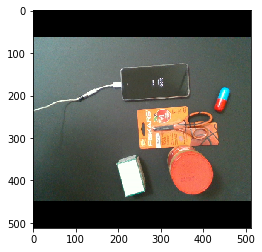

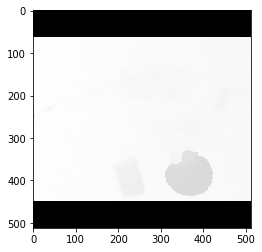

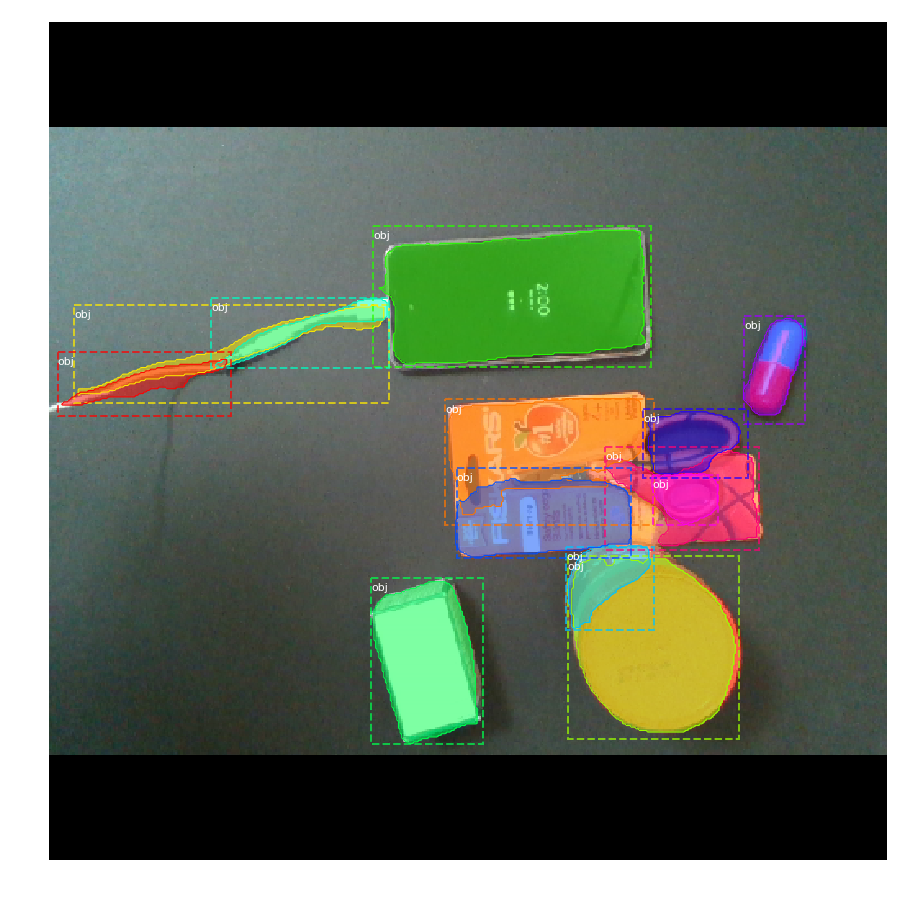

{'rois': array([[165, 325, 225, 386],
       [240, 134, 297, 245],
       [336, 276, 410, 329],
       [325, 260, 417, 383],
       [141, 386, 289, 492],
       [145, 151, 213, 271],
       [265, 318, 330, 483],
       [136, 259, 165, 392],
       [149, 247, 330, 503],
       [152, 156, 276, 367]], dtype=int32), 'scores': array([0.9980452 , 0.99732554, 0.9949575 , 0.99425066, 0.99099255,
       0.9115024 , 0.9068182 , 0.8988908 , 0.868774  , 0.78378713],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 10)


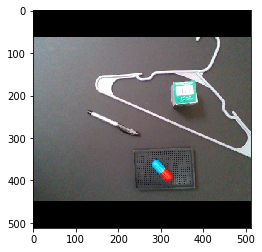

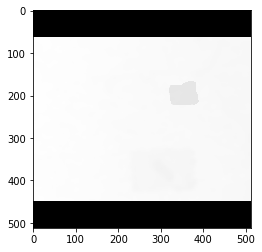

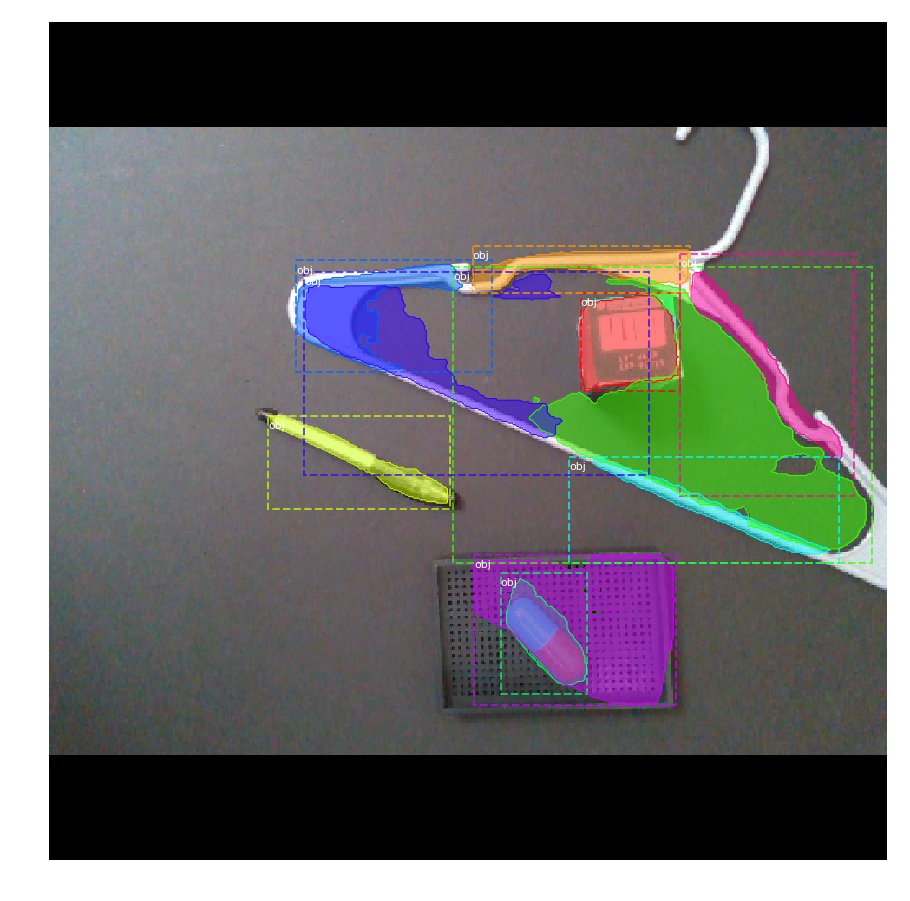

{'rois': array([[154, 206, 253, 284],
       [177, 404, 243, 471],
       [261, 154, 362, 300],
       [156, 287, 389, 436],
       [270, 342, 341, 422],
       [270, 130, 354, 158],
       [245, 290, 351, 306],
       [143, 249, 269, 405],
       [140, 243, 231, 303]], dtype=int32), 'scores': array([0.9984365 , 0.99753916, 0.99370146, 0.9876809 , 0.9157866 ,
       0.88925683, 0.78738326, 0.7398734 , 0.7200833 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 9)


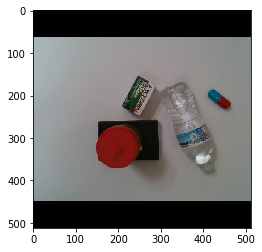

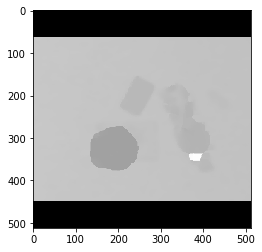

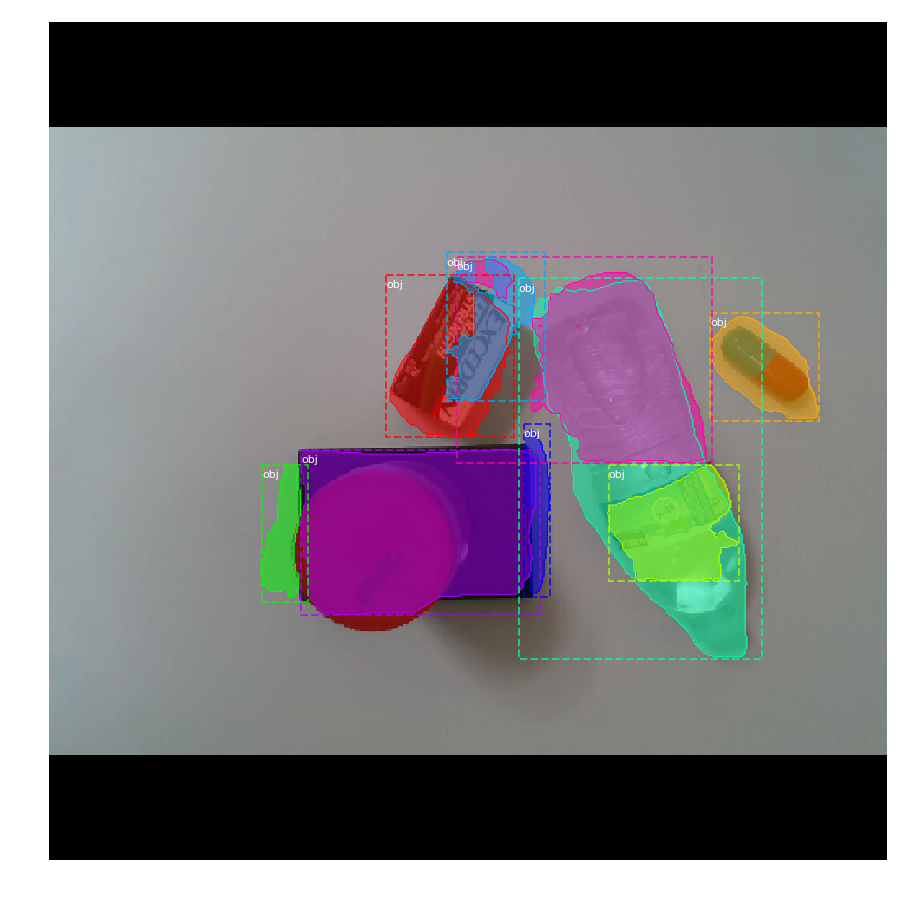

{'rois': array([[210, 404, 390, 494],
       [274, 200, 328, 255],
       [183, 247, 373, 366],
       [196, 161, 320, 300],
       [258, 197, 289, 225],
       [173, 273, 274, 362],
       [253, 291, 396, 398],
       [203, 415, 251, 493],
       [241, 167, 311, 239]], dtype=int32), 'scores': array([0.99985933, 0.9981407 , 0.9977316 , 0.9963582 , 0.9759602 ,
       0.97268593, 0.9298442 , 0.8957981 , 0.7886391 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 9)


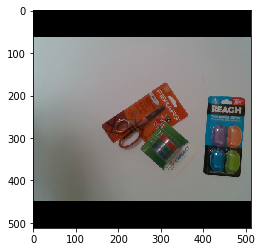

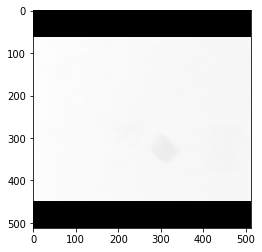

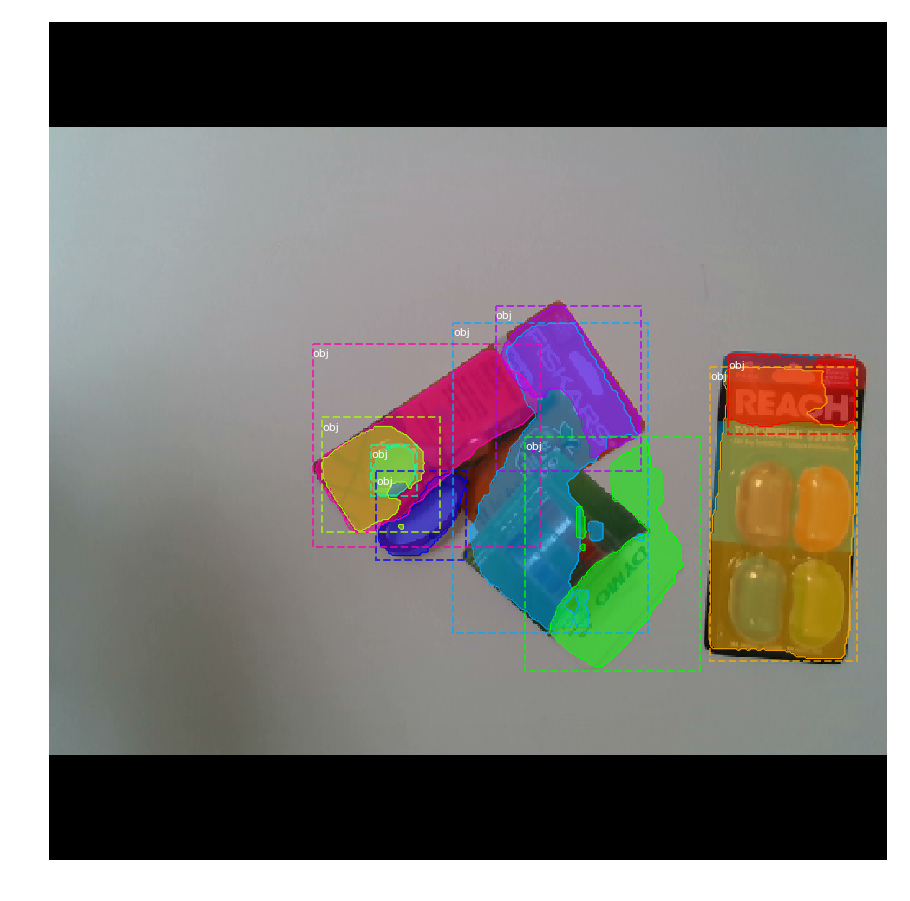

{'rois': array([[173, 220, 371, 442],
       [187, 276, 288, 333],
       [154, 412, 247, 504],
       [162, 302, 268, 454]], dtype=int32), 'scores': array([0.99961936, 0.9874199 , 0.9862686 , 0.9229751 ], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


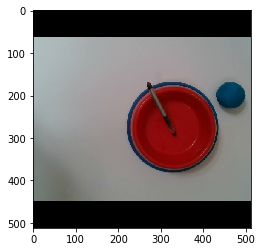

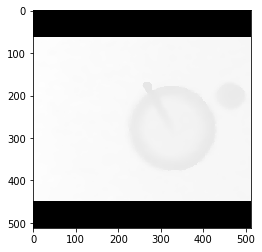

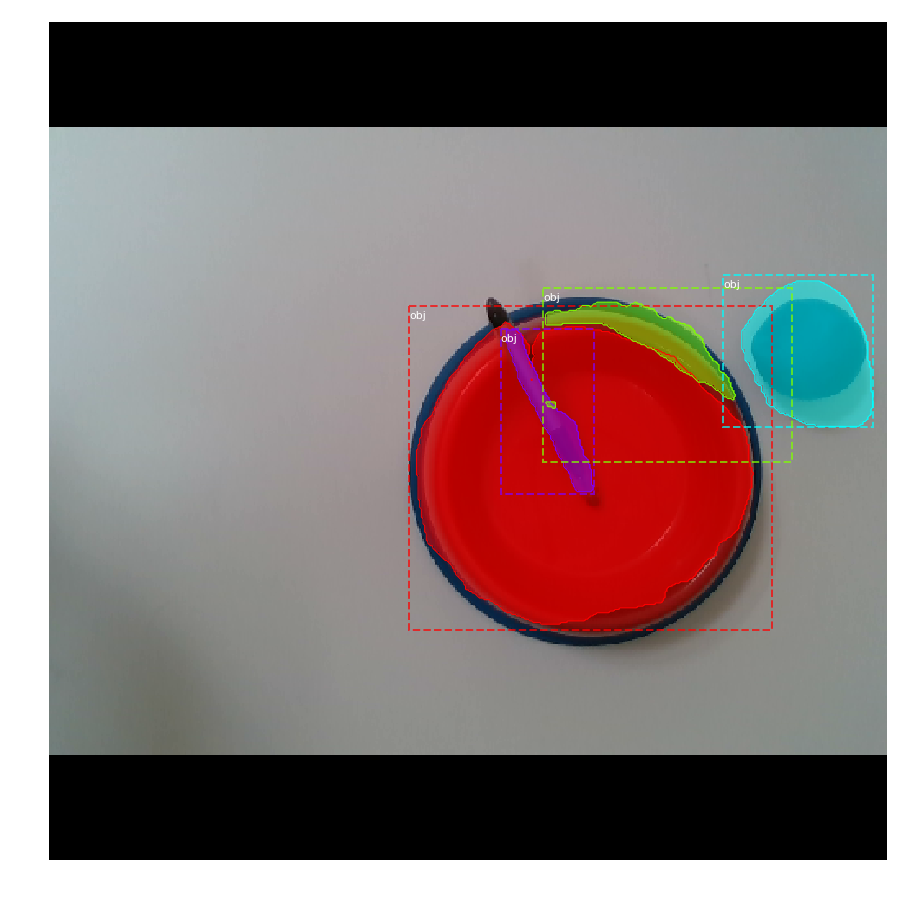

{'rois': array([[ 82, 276, 183, 331],
       [248, 268, 298, 354],
       [228,  96, 306, 215],
       [215, 280, 320, 503]], dtype=int32), 'scores': array([0.9998386 , 0.98965466, 0.98310274, 0.9130574 ], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


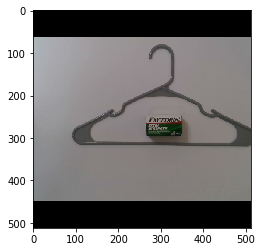

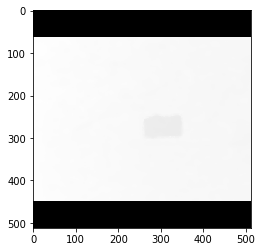

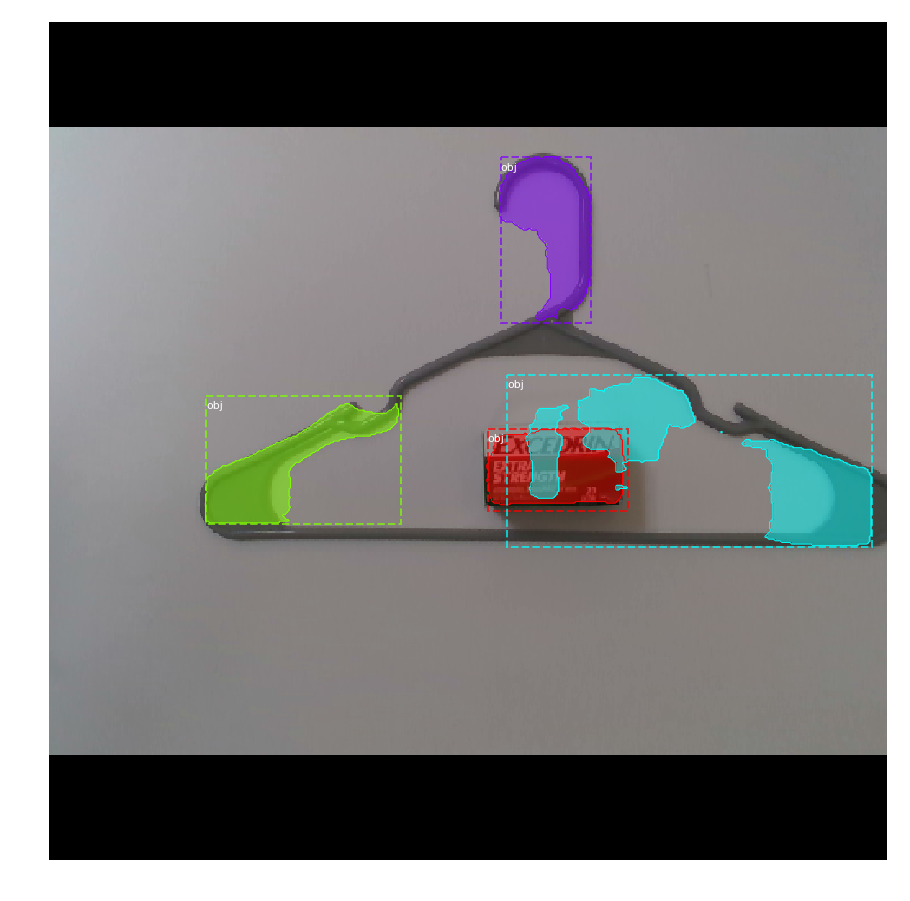

{'rois': array([[286, 232, 366, 361],
       [262, 386, 332, 476],
       [158, 270, 255, 370],
       [118, 299, 199, 403]], dtype=int32), 'scores': array([0.9995353 , 0.99946314, 0.9973908 , 0.78469604], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


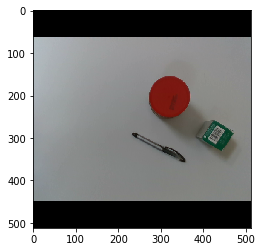

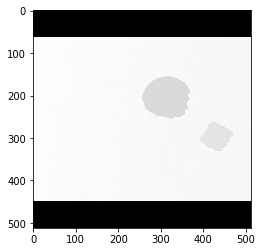

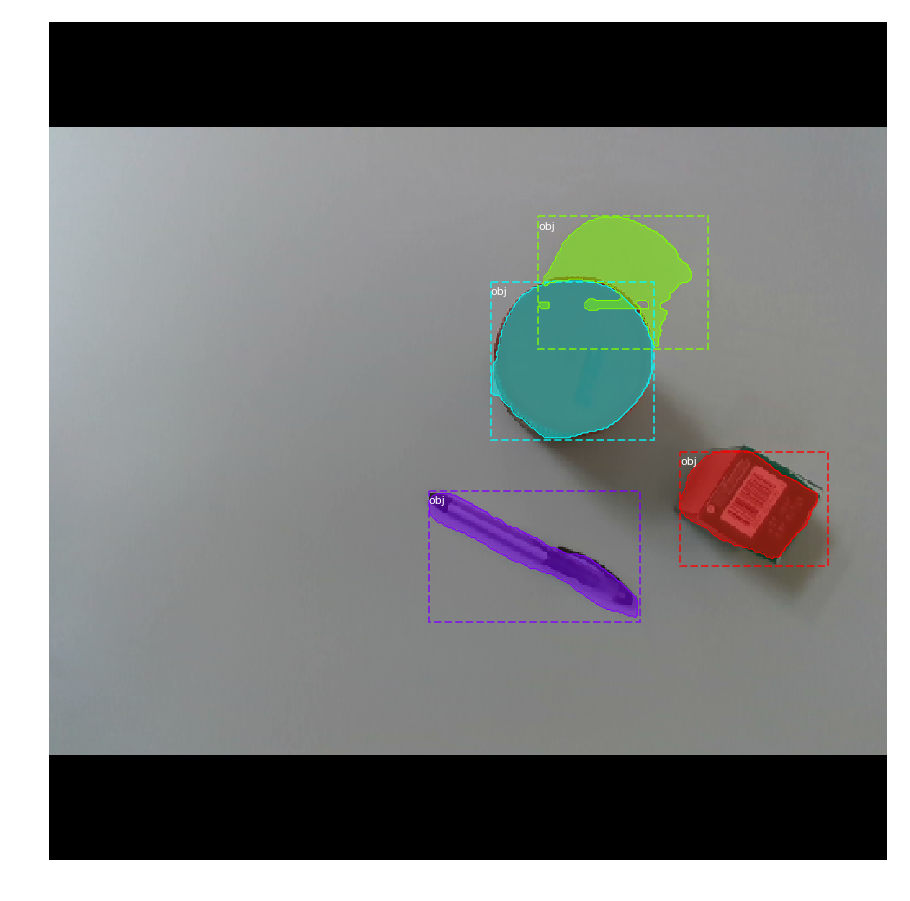

In [8]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    detect(model, color)